### **Input:**

1. ### Single Image

### **Output:**

1. ### List of Images in np Array format

2. ### List of transforms applied for each in JSON format

https://www.python.org/dev/peps/pep-0612/

## Image Used

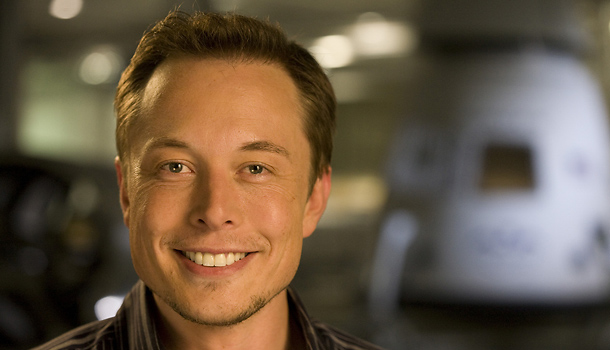

elon.jpeg



---



## Import all the libraries

In [2]:
from typing import List, Optional, Sequence, Tuple, Union

import cv2
import numpy as np

import math
import random
from typing import Any, Callable,Dict, List, Optional, Sequence, Tuple, Union

import matplotlib.pyplot as plt

import json
import base64

import tensorflow as tf

In [1]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     |████████████████████████████████| 102 kB 6.4 MB/s 
     |████████████████████████████████| 47.6 MB 32 kB/s 
albumentations==1.1.0 is successfully installed


In [3]:
import albumentations as A

## Reading the Image

In [4]:
def readImage():
  image= cv2.imread('/content/elon.jpg')
  return image


## Display the Image

In [5]:
def visualize(image):
  plt.imshow(image)
  plt.axis("OFF")
  plt.show()

## Convert the Image from BGR to RGB as OpenCV reads image in BGR instead of RGB as it follows historical colour convertion

In [6]:
def ConvertImageBGR2RGB(imageInBGR):
  imageBGR2RGB=cv2.cvtColor(imageInBGR, cv2.COLOR_BGR2RGB)
  return imageBGR2RGB



---



## Simple code to use the custom functions to read, and display Images

[[[30 27 18]
  [31 28 21]
  [31 28 21]
  ...
  [83 77 53]
  [84 78 56]
  [83 77 55]]

 [[30 28 16]
  [30 27 18]
  [32 29 22]
  ...
  [86 80 56]
  [86 80 56]
  [87 81 57]]

 [[30 28 16]
  [30 27 18]
  [32 29 20]
  ...
  [89 83 59]
  [90 84 60]
  [93 87 63]]

 ...

 [[12  7  3]
  [12  7  3]
  [11  6  2]
  ...
  [47 44 37]
  [45 44 39]
  [46 45 40]]

 [[15 10  4]
  [14  9  3]
  [14  9  3]
  ...
  [47 44 37]
  [43 42 37]
  [45 44 39]]

 [[13  8  2]
  [12  9  2]
  [13 10  3]
  ...
  [45 42 35]
  [41 41 33]
  [40 40 32]]]


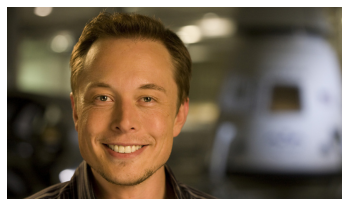

In [7]:
# Reading image using readImage() function
BGR_Image= readImage()

# Reading image using ConvertImageBGR2RGB() function
image = ConvertImageBGR2RGB(BGR_Image)
print(image)
# Displaying image using visualize() function
visualize(image)

# 1. Random Crop

### a. Custom Function to get Random Crop Coordinates

In [8]:
'''def get_crop_coords(height: int, width: int, crop_height: int, crop_width: int, h_start: float, w_start: float):
    return w_start, h_start, w_start+crop_width, h_start+crop_height'''

'def get_crop_coords(height: int, width: int, crop_height: int, crop_width: int, h_start: float, w_start: float):\n    return w_start, h_start, w_start+crop_width, h_start+crop_height'

### b. Custom Function to get the Random Crop

In [9]:
def random_crop(image: np.ndarray):
  #min crop ht=None, max...
    height, width,c = image.shape[:3]

    print("Height of Original Image",height)
    print("Width of Original Image",width)
    print("Number of channels of Original Image",c)
    print("----------------")
    max_crop_height = height //2
    min_crop_height = height //20
    max_crop_width = width //2
    min_crop_width = width //20

    print("max_crop_height :",max_crop_height)
    print("min_crop_height :",min_crop_height)
    print("max_crop_width :",max_crop_width)
    print("min_crop_width :",min_crop_width)
    print("----------------")

    crop_height=random.randint(min_crop_height,max_crop_height)
    crop_width=random.randint(min_crop_width,max_crop_width)

    print("crop_height :",crop_height)
    print("crop_width :",crop_width)
    print("----------------")

    h_start_max = height-crop_height
    h_start_min = 1

    w_start_max = height-crop_width
    w_start_min = 1
    
    h_start=random.randint(h_start_min,h_start_max)
    w_start=random.randint(w_start_min,w_start_max)

    print("h_start :",h_start)
    print("w_start :",w_start)
    print("----------------")



    if height < crop_height or width < crop_width:
        raise ValueError(
            "Requested crop size ({crop_height}, {crop_width}) is "
            "larger than the image size ({height}, {width})".format(
                crop_height=crop_height, crop_width=crop_width, height=height, width=width
            )
        )
    x1, y1, x2, y2 = w_start, h_start, w_start+crop_width, h_start+crop_height
    #get_random_crop_coords(height, width, crop_height, crop_width, h_start, w_start)
    d = dict(); 


    print("x1 :",x1)
    print("y1 :",y1)
    print("x2 :",x2)
    print("y2 :",y2)
    print("----------------")

    pixel_size=width*height
    print("Pixel Size :",pixel_size)
    print("----------------")

    print("Y Coordinate 1 :",y1)
    print("Y Coordinate 2 :",y2)
    print("X Coordinate 1 :",x1)
    print("X Coordinate 2 :",x2)

    img = image[y1:y2, x1:x2]
    d=randomcrop_coords_dict(img,x1, y1, crop_width, crop_height)
    print(img)
    print("----------------")
    print(d)
    return img

### c. Custom Function to get the Random Crop Coordinates in a **Dictionary** format that returns -
  1. Type of transform applied
  2. Transformed image in NP Array format
  3. X1 (X coordinate of the cropped Image)
  4. Y1 (Y coordinate of the cropped Image)
  5. Crop Width
  6. Crop Height

In [10]:
def randomcrop_coords_dict(img,x1,y1,crop_width,crop_height):
  random_crop_output_dict=dict()
  random_crop_output_dict['transform'] = "Random Crop"
  random_crop_output_dict['Transformed_image_Np_Array_Format']   = img
  random_crop_output_dict['x1']   = x1
  random_crop_output_dict['y1']   = y1  
  random_crop_output_dict['crop_width']   = crop_width
  random_crop_output_dict['crop_height']   = crop_height


  return random_crop_output_dict

#['random_crop': x1 : value,y1 : value,widht: value, height: value]



---



# 2. Random Scaling
{Reducing the size only}

https://www.includehelp.com/python/resize-an-rgb-image-without-using-any-inbuilt-functions.aspx

https://stackoverflow.com/questions/64576675/resize-image-in-python-without-using-resize-nearest-neighbor

https://github.com/albumentations-team/albumentations

In [11]:
from functools import wraps


In [12]:
def get_num_channels(image):
    return image.shape[2] if len(image.shape) == 3 else 1

In [13]:
def _maybe_process_in_chunks(process_fn, **kwargs):
    """
    Wrap OpenCV function to enable processing images with more than 4 channels.
    Limitations:
        This wrapper requires image to be the first argument and rest must be sent via named arguments.
    Args:
        process_fn: Transform function (e.g cv2.resize).
        kwargs: Additional parameters.
    Returns:
        numpy.ndarray: Transformed image.
    """

    @wraps(process_fn)
    def __process_fn(img):
        num_channels = get_num_channels(img)
        if num_channels > 4:
            chunks = []
            for index in range(0, num_channels, 4):
                if num_channels - index == 2:
                    # Many OpenCV functions cannot work with 2-channel images
                    for i in range(2):
                        chunk = img[:, :, index + i : index + i + 1]
                        chunk = process_fn(chunk, **kwargs)
                        chunk = np.expand_dims(chunk, -1)
                        chunks.append(chunk)
                else:
                    chunk = img[:, :, index : index + 4]
                    chunk = process_fn(chunk, **kwargs)
                    chunks.append(chunk)
            img = np.dstack(chunks)
        else:
            img = process_fn(img, **kwargs)
        return img

    return __process_fn


In [14]:
'''def resize(img, height, width, interpolation=cv2.INTER_LINEAR):
    img_height, img_width = img.shape[:2]
    if height == img_height and width == img_width:
        return img
    resize_fn = _maybe_process_in_chunks(cv2.resize, dsize=(width, height), interpolation=interpolation)
    return resize_fn(img)'''

'def resize(img, height, width, interpolation=cv2.INTER_LINEAR):\n    img_height, img_width = img.shape[:2]\n    if height == img_height and width == img_width:\n        return img\n    resize_fn = _maybe_process_in_chunks(cv2.resize, dsize=(width, height), interpolation=interpolation)\n    return resize_fn(img)'

In [15]:
def resize(img,Increase_or_Decrease=1, interpolation=cv2.INTER_LINEAR):
    # 1= increase size
    # 0 = reduce size
    img_height, img_width = img.shape[:2]

    #limit for image height increase is img height to 10times the image height
    increase_height_max =img_height*10
    increase_height_min =img_height

    #limit for image height increase is img height to 10times the image height
    increase_width_max =img_width*10
    increase_width_min =img_width

    #height and width are being chosen randomly
    increase_height =random.randint(increase_height_min,increase_height_max)
    increase_width =random.randint(increase_width_min,increase_width_max)

    #limit for image height increase is img height to 10times the image height
    decrease_height_max =img_height
    decrease_height_min =img_height*(0.1)

    #limit for image height increase is img height to 10times the image height
    decrease_width_max =img_width
    decrease_width_min =img_width*(0.1)

    #height and width are being chosen randomly
    decrease_height =random.randint(decrease_height_min,decrease_height_max)
    decrease_width =random.randint(decrease_width_min,decrease_width_max)

    
    
    if increase_height == img_height and increase_width == img_width:
        return img
    elif decrease_height == img_height and decrease_width == img_width:
        return img
    elif Increase_or_Decrease==1:
      resize_fn = _maybe_process_in_chunks(cv2.resize, dsize=(increase_width, increase_height), interpolation=interpolation)
      return resize_fn(img)
    elif Increase_or_Decrease==0:
      resize_fn = _maybe_process_in_chunks(cv2.resize, dsize=(decrease_width, decrease_height), interpolation=interpolation)
      return resize_fn(img)

In [16]:
def downscale(img, scale, interpolation=cv2.INTER_NEAREST):
    h, w = img.shape[:2]
    print(h)
    print(w)
    need_cast = interpolation != cv2.INTER_NEAREST and img.dtype == np.uint8
    if need_cast:
        img = to_float(img)
    downscaled = cv2.resize(img, None, fx=scale, fy=scale, interpolation=interpolation)
    visualize(downscale)
    upscaled = cv2.resize(downscaled, (w, h), interpolation=interpolation)
    visualize(upscaled)

    if need_cast:
        upscaled = from_float(np.clip(upscaled, 0, 1), dtype=np.dtype("uint8"))
    return upscaled

### c. Custom Function to get the Random Crop Coordinates in a **Dictionary** format that returns -
  1. Type of transform applied
  2. Transformed image in NP Array format
  3. X1 (X coordinate of the cropped Image)
  4. Y1 (Y coordinate of the cropped Image)
  5. Crop Width
  6. Crop Height

In [ ]:
def randomscale_coords_dict(img,x1,y1,crop_width,crop_height):
  random_crop_output_dict=dict()
  random_crop_output_dict['transform'] = "Random Crop"
  random_crop_output_dict['Transformed_image_Np_Array_Format']   = img
  random_crop_output_dict['x1']   = x1
  random_crop_output_dict['y1']   = y1  
  random_crop_output_dict['crop_width']   = crop_width
  random_crop_output_dict['crop_height']   = crop_height


  return random_crop_output_dict

#['random_crop': x1 : value,y1 : value,widht: value, height: value]

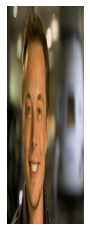

(2825, 988, 3)


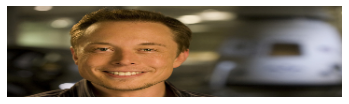

(97, 359, 3)


In [17]:
BGR_Image= readImage()

image = ConvertImageBGR2RGB(BGR_Image)
a=resize(image,1 )
b=resize(image,0 )

visualize(a)
print(a.shape)

visualize(b)
print(b.shape)




---



# 3. Random Rotate 90

In [ ]:
def random_rotate90(img, factor=0, **params):
        """
        Args:
            factor (int): number of times the input will be rotated by 90 degrees.
        """
        return np.ascontiguousarray(np.rot90(img, factor))

'''def apply_to_keypoint(self, keypoint, factor=0, **params):
    return F.keypoint_rot90(keypoint, factor, **params)
'''
def rot90(img, factor):
    img = np.rot90(img, factor)
    return np.ascontiguousarray(img)

'''def keypoint_transpose(keypoint):
    """Rotate a keypoint by angle.
    Args:
        keypoint (tuple): A keypoint `(x, y, angle, scale)`.
    Returns:
        tuple: A keypoint `(x, y, angle, scale)`.
    """
    x, y, angle, scale = keypoint[:4]

    if angle <= np.pi:
        angle = np.pi - angle
    else:
        angle = 3 * np.pi - angle

    return y, x, angle, scale'''
    

'def keypoint_transpose(keypoint):\n    """Rotate a keypoint by angle.\n    Args:\n        keypoint (tuple): A keypoint `(x, y, angle, scale)`.\n    Returns:\n        tuple: A keypoint `(x, y, angle, scale)`.\n    """\n    x, y, angle, scale = keypoint[:4]\n\n    if angle <= np.pi:\n        angle = np.pi - angle\n    else:\n        angle = 3 * np.pi - angle\n\n    return y, x, angle, scale'

Cutout

In [ ]:
def cutout(img, holes, fill_value=0):
    # Make a copy of the input image since we don't want to modify it directly
    img = img.copy()
    for x1, y1, x2, y2 in holes:
        img[y1:y2, x1:x2] = fill_value
    return img



---



# 4. RandomRotate

In [ ]:
from functools import wraps


In [ ]:
def random_rotate(img,interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_REFLECT_101, value=None):
    angle=random.randint(30,60)
    height, width = img.shape[:2]
    matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1.0)

    warp_fn = _maybe_process_in_chunks(
        cv2.warpAffine, M=matrix, dsize=(width, height), flags=interpolation, borderMode=border_mode, borderValue=value
    )
    rotated_image=warp_fn(img)
    #img = image[y1:y2, x1:x2]
    random_rotate_dict=random_rotate_coords_dict(img,angle)
    print(rotated_image)
    print("----------------")
    print(random_rotate_dict)
    height, width,c = rotated_image.shape[:3]

    print("Height of Original Image",height)
    print("Width of Original Image",width)
    print("Number of channels of Original Image",c)
    return rotated_image
def get_num_channels(image):
    return image.shape[2] if len(image.shape) == 3 else 1
def _maybe_process_in_chunks(process_fn, **kwargs):
    """
    Wrap OpenCV function to enable processing images with more than 4 channels.
    Limitations:
        This wrapper requires image to be the first argument and rest must be sent via named arguments.
    Args:
        process_fn: Transform function (e.g cv2.resize).
        kwargs: Additional parameters.
    Returns:
        numpy.ndarray: Transformed image.
    """

    @wraps(process_fn)
    def __process_fn(img):
        num_channels = get_num_channels(img)
        if num_channels > 4:
            chunks = []
            for index in range(0, num_channels, 4):
                if num_channels - index == 2:
                    # Many OpenCV functions cannot work with 2-channel images
                    for i in range(2):
                        chunk = img[:, :, index + i : index + i + 1]
                        chunk = process_fn(chunk, **kwargs)
                        chunk = np.expand_dims(chunk, -1)
                        chunks.append(chunk)
                else:
                    chunk = img[:, :, index : index + 4]
                    chunk = process_fn(chunk, **kwargs)
                    chunks.append(chunk)
            img = np.dstack(chunks)
        else:
            img = process_fn(img, **kwargs)
        return img

    return __process_fn
    

In [ ]:
def random_rotate_coords_dict(img,angle):
  random_rotate_output_dict=dict()
  random_rotate_output_dict['transform'] = "Random Rotate"
  random_rotate_output_dict['Transformed_image_Np_Array_Format']   = img
  #random_crop_output_dict['x1']   = x1
  #random_crop_output_dict['y1']   = y1  
  #random_crop_output_dict['crop_width']   = crop_width
  random_rotate_output_dict['angle']   = angle


  return random_rotate_output_dict

#['random_crop': x1 : value,y1 : value,widht: value, height: value]

# 5. Random_Shift_Scale_Rotate

The getRotationMatrix2D() function takes the following arguments:

center: the center of rotation for the input image
angle: the angle of rotation in degrees
scale: an isotropic scale factor which scales the image up or down according to the value provided
If the angle is positive, the image gets rotated in the counter-clockwise direction. If you want to rotate the image clockwise by the same amount, then the angle needs to be negative.

Rotation is a three-step operation:

First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.
Next, create the 2D-rotation matrix. OpenCV provides the getRotationMatrix2D() function that we discussed above. 
Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The warpAffine() function in OpenCV does the job.
The warpAffine() function applies an affine transformation to the image. After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well.

The complete syntax for warpAffine() is given below:

warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

The following are the arguments of the function:

src: the source mage
M: the transformation matrix
dsize: size of the output image
dst: the output image
flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
borderMode: the pixel extrapolation method
borderValue: the value to be used in case of a constant border, has a default value of 0
Note: You can learn more about OpenCV affine transformations here

Okay, now that you know the code and the functions, let’s take a concrete example and try doing it, using OpenCV. Start by importing the OpenCV library and reading an image.

https://learnopencv.com/image-rotation-and-translation-using-opencv/

In [ ]:
def shift_scale_rotate(
    img, interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_REFLECT_101, value=None
):
    angle = random.randint(30,60)
    scale = random.randint(30,60)
    dx = random.randint(30,60)
    dy = random.randint(30,60)
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    matrix = cv2.getRotationMatrix2D(center, angle, scale)
    matrix[0, 2] += dx * width
    matrix[1, 2] += dy * height

    warp_affine_fn = _maybe_process_in_chunks(
        cv2.warpAffine, M=matrix, dsize=(width, height), flags=interpolation, borderMode=border_mode, borderValue=value
    )
    return warp_affine_fn(img)


INPUT


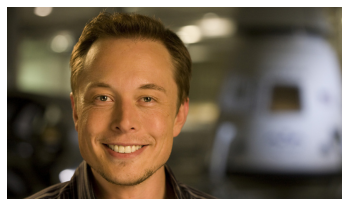

LOADING
Crop randomly degrees
Height of Original Image 350
Width of Original Image 610
Number of channels of Original Image 3
----------------
max_crop_height : 175
min_crop_height : 17
max_crop_width : 305
min_crop_width : 30
----------------
crop_height : 120
crop_width : 128
----------------
h_start : 36
w_start : 10
----------------
x1 : 10
y1 : 36
x2 : 138
y2 : 156
----------------
Pixel Size : 213500
----------------
Y Coordinate 1 : 36
Y Coordinate 2 : 156
X Coordinate 1 : 10
X Coordinate 2 : 138
[[[ 48  44  32]
  [ 49  45  33]
  [ 49  45  33]
  ...
  [ 64  57  39]
  [ 64  56  35]
  [ 64  55  40]]

 [[ 49  45  33]
  [ 49  45  33]
  [ 49  45  33]
  ...
  [ 64  57  39]
  [ 66  59  40]
  [ 64  57  41]]

 [[ 48  44  32]
  [ 48  44  32]
  [ 48  44  32]
  ...
  [ 63  56  38]
  [ 64  58  42]
  [ 63  58  39]]

 ...

 [[ 30  28  16]
  [ 31  29  17]
  [ 32  28  16]
  ...
  [125  87  40]
  [127  89  42]
  [124  87  42]]

 [[ 28  26  14]
  [ 29  27  15]
  [ 29  27  14]
  ...
  [135  97  50]

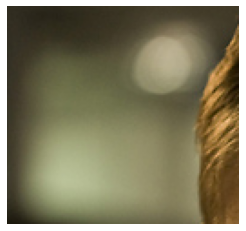

Rotate randomly degrees
[[[187 124  63]
  [182 120  60]
  [174 112  57]
  ...
  [207 210 227]
  [205 208 224]
  [205 208 223]]

 [[179 116  56]
  [170 108  51]
  [164 103  52]
  ...
  [205 208 225]
  [205 208 225]
  [205 208 224]]

 [[172 110  56]
  [163 103  52]
  [156 100  50]
  ...
  [205 208 225]
  [205 208 225]
  [204 207 224]]

 ...

 [[171 178 136]
  [171 178 136]
  [171 178 136]
  ...
  [ 65  64  59]
  [ 65  66  60]
  [ 67  66  62]]

 [[172 179 137]
  [173 180 138]
  [172 179 138]
  ...
  [ 66  64  59]
  [ 66  66  61]
  [ 66  67  61]]

 [[173 180 138]
  [174 181 139]
  [175 182 140]
  ...
  [ 67  64  59]
  [ 66  65  60]
  [ 67  67  62]]]
----------------
{'transform': 'Random Rotate', 'Transformed_image_Np_Array_Format': array([[[30, 27, 18],
        [31, 28, 21],
        [31, 28, 21],
        ...,
        [83, 77, 53],
        [84, 78, 56],
        [83, 77, 55]],

       [[30, 28, 16],
        [30, 27, 18],
        [32, 29, 22],
        ...,
        [86, 80, 56],
        [86, 

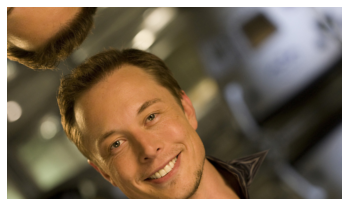

shift_scale_rotate randomly degrees


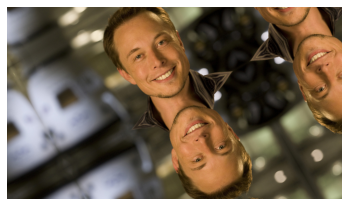

350
610
3


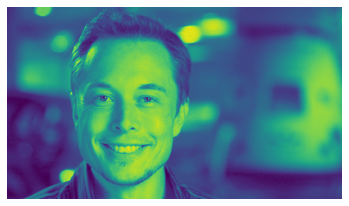

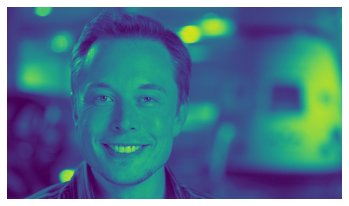

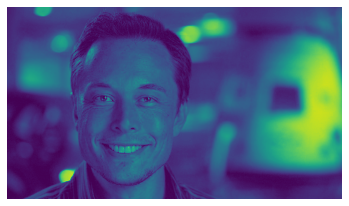

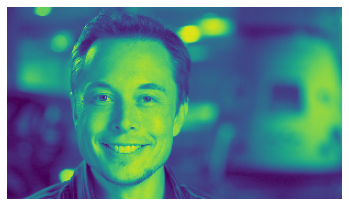

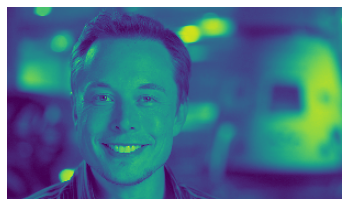

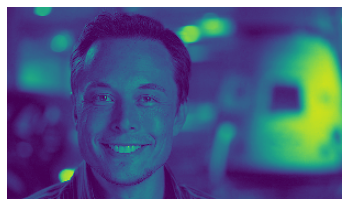

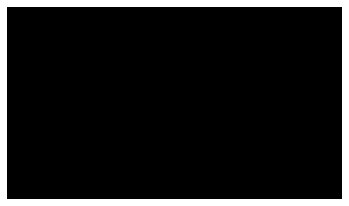

In [ ]:
BGR_Image= readImage()

image = ConvertImageBGR2RGB(BGR_Image)

print("INPUT")

#int(input())
#1,350-crop height
visualize(image)

print("LOADING")

print("Crop randomly degrees")

visualize(random_crop(image))



print("Rotate randomly degrees")
visualize(random_rotate(image))

print("shift_scale_rotate randomly degrees")

visualize(shift_scale_rotate(image,30,0.6,10,20))

#visualize(random_rotate90(image))

visualize(random_scaling(image))

#coodrdiate, x1,y1 and width , height, along with image
#image, list of coords

#{transforms: key
#    ['random_crop': x1 : value,y1 : value,widht: value, height: value]
 
# }

loading the mini-batches fed to the model dynamically. This is exactly what data generators do. They can generate the model input dynamically thus forming a pipeline from the storage to the RAM to load the data as and when it is required. Another advantage of this pipeline is, one can easily apply preprocessing routines on these mini-batches of data as they are prepared to feed the model.

### CUSTOM DATA GENERATOR CODE

In [ ]:
class DataGenerator(Sequence):
    """Generates data for Keras
    Sequence based data generator. Suitable for building data generator for training and prediction.
    """
    def __init__(self, list_IDs, labels, image_path, 
                 to_fit=True, batch_size=1, dim=(256, 256),
                 n_channels=1, n_classes=10, shuffle=True):
        """Initialization
        :param list_IDs: list of all 'label' ids to use in the generator
        :param labels: list of image labels (file names)
        :param image_path: path to images location
        :param mask_path: path to masks location
        :param to_fit: True to return X and y, False to return X only
        :param batch_size: batch size at each iteration
        :param dim: tuple indicating image dimension
        :param n_channels: number of image channels
        :param n_classes: number of output masks
        :param shuffle: True to shuffle label indexes after every epoch
        """
        self.list_IDs = list_IDs
        self.labels = labels
        self.image_path = image_path
        #self.mask_path = mask_path
        self.to_fit = to_fit
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
# First, we define the constructor to initialize the configuration of the generator. 
# we assume the path to the data is in a dataframe column. 
# Hence, we define the x_col and y_col parameters. 
# This could also be a directory name from where you can load the data.

    #Another utility method we have is __len__. 
    #It essentially returns the number of steps in an epoch, using the samples and the batch size.
    def __len__(self):
        # Denotes the number of batches per epoch
        return int(np.floor(len(self.list_IDs) / self.batch_size))
        """Denotes the number of batches per epoch
        :return: number of batches per epoch
        """
    

    def __getitem__(self, index):
        """Generate one batch of data
        :param index: index of the batch
        :return: X and y when fitting. X only when predicting
        """
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = self._generate_X(list_IDs_temp)

        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else:
            return X

    #The on_epoch_end method is a method that is called after every epoch. We can add routines like shuffling here.
    # Basically, we shuffled the order of the dataframe rows in this snippet.

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)



    def _generate_X(self, list_IDs_temp):
        """Generates data containing batch_size images
        :param list_IDs_temp: list of label ids to load
        :return: batch of images
        """
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = self._load_grayscale_image(self.image_path + self.labels[ID])

        return X

    '''def _generate_y(self, list_IDs_temp):
        """Generates data containing batch_size masks
        :param list_IDs_temp: list of label ids to load
        :return: batch if masks
        """
        y = np.empty((self.batch_size, *self.dim), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            y[i,] = self._load_grayscale_image(self.mask_path + self.labels[ID])

        return y
'''
    def random_crop_flow(self,image,batchsize=20):
      for i in range(batchsize):
        img=visualize(random_crop(image))
        return img  

    def random_scaling_flow(self,image,batchsize=20, x=2,y=2):
      for i in range(batchsize):
        img=visualize(random_scaling(image,x,y))
        return img  

    def _load_grayscale_image(self, image_path):
        """Load grayscale image
        :param image_path: path to image to load
        :return: loaded image
        """
        img = cv2.imread('/content/elon.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255
        return img

https://github.com/keras-team/keras/blob/master/keras/preprocessing/image.py

# MAIN CODE

Height of Original Image 350
Width of Original Image 610
Number of channels of Original Image 3
----------------
max_crop_height : 175
min_crop_height : 17
max_crop_width : 305
min_crop_width : 30
----------------
crop_height : 84
crop_width : 280
----------------
h_start : 9
w_start : 55
----------------
x1 : 55
y1 : 9
x2 : 335
y2 : 84
----------------
Pixel Size : 213500
----------------
Y Coordinate 1 : 9
Y Coordinate 2 : 84
X Coordinate 1 : 55
X Coordinate 2 : 335
[[[192 174 150]
  [196 176 152]
  [198 178 154]
  ...
  [ 92  84  61]
  [ 91  83  60]
  [ 93  85  62]]

 [[193 175 151]
  [195 177 153]
  [196 178 154]
  ...
  [ 91  83  60]
  [ 90  82  59]
  [ 91  83  60]]

 [[196 176 152]
  [195 177 153]
  [195 177 153]
  ...
  [ 89  81  58]
  [ 88  80  57]
  [ 88  80  57]]

 ...

 [[105 106  72]
  [105 107  70]
  [106 108  71]
  ...
  [132 119  85]
  [139 126  92]
  [139 129  94]]

 [[107 109  72]
  [108 110  73]
  [108 110  73]
  ...
  [127 114  82]
  [134 124  89]
  [139 129  94]]

 

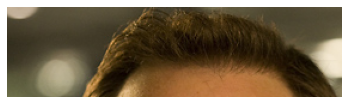

ValueError: ignored

In [ ]:
#DataGenerator.__init__()
image_path="/content/elon.jpg"
BGR_Image= readImage()
image = ConvertImageBGR2RGB(BGR_Image)

an_object = DataGenerator([1],"elon",image_path) 
#print(an_object._load_grayscale_image)
an_object.random_crop_flow(image,20)
an_object.random_scaling_flow(image,20,2,2)



---



---



In [ ]:
Shrinking Size

def random_scaling(img: np.ndarray, x=2,y=2):
  # assigning number of rows, coulmns and
  # planes to the respective variables
  height, width,plane = img.shape[:3]
  print(height)
  print(width)
  print(plane)
  
  # give value by which you want to resize an image
  # here we want to resize an image as one half of the original image
  #x=random.randint(1,5)
  #y=random.randint(1,5)

  # assign Blue plane of the BGR image
  # to the blue_plane variable
  blue_plane = img[:,:,0]
  visualize (blue_plane)
  # assign Green plane of the BGR image
  # to the green_plane variable
  green_plane = img[:,:,1]
  visualize (green_plane)

  # assign Red plane of the BGR image
  # to the red_plane variable
  red_plane = img[:,:,2]
  visualize (red_plane)

  # we take one-half pixel of rows and columns from
  # each plane respectively so that, it is one-half of image matrix.

  # here we take alternate row,column pixel of blue plane.
  resize_blue_plane = blue_plane[1::x,1::x] 
  # from 1 to end u r picking every the xth sample a= [1,2,3,4] a[1::2]=1,3 x dirxn has reduced by 1/2
  visualize (resize_blue_plane)

  # here we take alternate row,column pixel of green plane.
  resize_green_plane = green_plane[1::x,1::x]
  visualize (resize_green_plane)

  # here we take alternate row,column pixel of red plane.
  resize_red_plane = red_plane[1::x,1::x]
  visualize (resize_red_plane)

  # here image is of class 'uint8', the range of values  
  # that each colour component can have is [0 - 255]
  
  # create a zero matrix of specified order of 3-dimension
  resize_img = np.zeros((height//x, width//y, plane),np.uint8)
  #visualize (resize_img)


  # assigning resized blue, green and red plane of image matrix to the
  # corresponding blue, green, red plane of resize_img matrix variable.
  #resize_img[:,:,0] = resize_blue_plane
  #resize_img[:,:,1] = resize_green_plane
  #resize_img[:,:,2] = resize_red_plane
  return resize_img



a= [1,2,3,4] #interpolation
a[1::0.2]
1,1.5,2,2.5,3,3.5,4 # linear interpolation

2d interpolation for 2d array (make it bigger)
##interpolation techniques (CHECK)



---



# **GENERATING MORE DATA FROM FOR SINGLE IMAGE**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/cat.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `sample_data/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='sample_data', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = DataGenerator()

#img = load_img('/content/cat.jpg')  # this is a PIL image
x = img_to_array(image)  # this is a Numpy array with shape (3, 150, 150)
x = image.reshape((1,) + image.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `sample_data/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='sample_data', save_prefix='elon', save_format='jpeg'):
    visualize(batch)
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

TypeError: ignored

In [ ]:
data = {}
#with open('/content/elon.jpg', mode='rb') as file:
 #   img = file.read()
#data['img'] = base64.b64encode(image)
data['img'] = base64.encodebytes(image).decode('utf-8')

print(json.dumps(data))

In [ ]:
def apply(self, img, h_start=0, w_start=0, **params):
        return random_crop(img, self.height, self.width, h_start, w_start)



---





---



# FURTHER IMPLEMENTATION



---



---



---



---

class RandomCrop(DualTransform):
    """Crop a random part of the input.
    Args:
        height (int): height of the crop.
        width (int): width of the crop.
        p (float): probability of applying the transform. Default: 1.
    Targets:
        image, mask, bboxes, keypoints
    Image types:
        uint8, float32
    """

    def __init__(self, height, width, always_apply=False, p=1.0):
        super().__init__(always_apply, p)
        self.height = height
        self.width = width

    def apply(self, img, h_start=0, w_start=0, **params):
        return F.random_crop(img, self.height, self.width, h_start, w_start)

    def get_params(self):
        return {"h_start": random.random(), "w_start": random.random()}
        
    def get_transform_init_args_names(self):
        return ("height", "width")

'''    def apply_to_bbox(self, bbox, **params):
        return F.bbox_random_crop(bbox, self.height, self.width, **params)

    def apply_to_keypoint(self, keypoint, **params):
        return F.keypoint_random_crop(keypoint, self.height, self.width, **params)
'''


In [ ]:
from typing import List, Optional, Sequence, Tuple, Union

import cv2
import numpy as np

from ..bbox_utils import denormalize_bbox, normalize_bbox
from ..functional import _maybe_process_in_chunks, pad_with_params, preserve_channel_dim
from ..geometric import functional as FGeometric

BboxType = Union[List[int], List[float], Tuple[int, ...], Tuple[float, ...], np.ndarray]
KeypointType = Union[List[int], List[float], Tuple[int, ...], Tuple[float, ...], np.ndarray]


def get_random_crop_coords(height: int, width: int, crop_height: int, crop_width: int, h_start: float, w_start: float):
    y1 = int((height - crop_height) * h_start)
    y2 = y1 + crop_height
    x1 = int((width - crop_width) * w_start)
    x2 = x1 + crop_width
    return x1, y1, x2, y2


def random_crop(img: np.ndarray, crop_height: int, crop_width: int, h_start: float, w_start: float):
    height, width = img.shape[:2]
    if height < crop_height or width < crop_width:
        raise ValueError(
            "Requested crop size ({crop_height}, {crop_width}) is "
            "larger than the image size ({height}, {width})".format(
                crop_height=crop_height, crop_width=crop_width, height=height, width=width
            )
        )
    x1, y1, x2, y2 = get_random_crop_coords(height, width, crop_height, crop_width, h_start, w_start)
    img = img[y1:y2, x1:x2]
    return img


def crop_bbox_by_coords(
    bbox: BboxType, crop_coords: Tuple[int, int, int, int], crop_height: int, crop_width: int, rows: int, cols: int
):
    """Crop a bounding box using the provided coordinates of bottom-left and top-right corners in pixels and the
    required height and width of the crop.
    Args:
        bbox (tuple): A cropped box `(x_min, y_min, x_max, y_max)`.
        crop_coords (tuple): Crop coordinates `(x1, y1, x2, y2)`.
        crop_height (int):
        crop_width (int):
        rows (int): Image rows.
        cols (int): Image cols.
    Returns:
        tuple: A cropped bounding box `(x_min, y_min, x_max, y_max)`.
    """
    bbox = denormalize_bbox(bbox, rows, cols)
    x_min, y_min, x_max, y_max = bbox[:4]
    x1, y1, _, _ = crop_coords
    cropped_bbox = x_min - x1, y_min - y1, x_max - x1, y_max - y1
    return normalize_bbox(cropped_bbox, crop_height, crop_width)


def bbox_random_crop(
    bbox: BboxType, crop_height: int, crop_width: int, h_start: float, w_start: float, rows: int, cols: int
):
    crop_coords = get_random_crop_coords(rows, cols, crop_height, crop_width, h_start, w_start)
    return crop_bbox_by_coords(bbox, crop_coords, crop_height, crop_width, rows, cols)


def crop_keypoint_by_coords(keypoint: KeypointType, crop_coords: Tuple[int, int, int, int]):  # skipcq: PYL-W0613
    """Crop a keypoint using the provided coordinates of bottom-left and top-right corners in pixels and the
    required height and width of the crop.
    Args:
        keypoint (tuple): A keypoint `(x, y, angle, scale)`.
        crop_coords (tuple): Crop box coords `(x1, x2, y1, y2)`.
    Returns:
        A keypoint `(x, y, angle, scale)`.
    """
    x, y, angle, scale = keypoint[:4]
    x1, y1, _, _ = crop_coords
    return x - x1, y - y1, angle, scale


def keypoint_random_crop(
    keypoint: KeypointType, crop_height: int, crop_width: int, h_start: float, w_start: float, rows: int, cols: int
):
    """Keypoint random crop.
    Args:
        keypoint: (tuple): A keypoint `(x, y, angle, scale)`.
        crop_height (int): Crop height.
        crop_width (int): Crop width.
        h_start (int): Crop height start.
        w_start (int): Crop width start.
        rows (int): Image height.
        cols (int): Image width.
    Returns:
        A keypoint `(x, y, angle, scale)`.
    """
    crop_coords = get_random_crop_coords(rows, cols, crop_height, crop_width, h_start, w_start)
    return crop_keypoint_by_coords(keypoint, crop_coords)


def get_center_crop_coords(height: int, width: int, crop_height: int, crop_width: int):
    y1 = (height - crop_height) // 2
    y2 = y1 + crop_height
    x1 = (width - crop_width) // 2
    x2 = x1 + crop_width
    return x1, y1, x2, y2


def center_crop(img: np.ndarray, crop_height: int, crop_width: int):
    height, width = img.shape[:2]
    if height < crop_height or width < crop_width:
        raise ValueError(
            "Requested crop size ({crop_height}, {crop_width}) is "
            "larger than the image size ({height}, {width})".format(
                crop_height=crop_height, crop_width=crop_width, height=height, width=width
            )
        )
    x1, y1, x2, y2 = get_center_crop_coords(height, width, crop_height, crop_width)
    img = img[y1:y2, x1:x2]
    return img


def bbox_center_crop(bbox: BboxType, crop_height: int, crop_width: int, rows: int, cols: int):
    crop_coords = get_center_crop_coords(rows, cols, crop_height, crop_width)
    return crop_bbox_by_coords(bbox, crop_coords, crop_height, crop_width, rows, cols)


def keypoint_center_crop(keypoint: KeypointType, crop_height: int, crop_width: int, rows: int, cols: int):
    """Keypoint center crop.
    Args:
        keypoint (tuple): A keypoint `(x, y, angle, scale)`.
        crop_height (int): Crop height.
        crop_width (int): Crop width.
        rows (int): Image height.
        cols (int): Image width.
    Returns:
        tuple: A keypoint `(x, y, angle, scale)`.
    """
    crop_coords = get_center_crop_coords(rows, cols, crop_height, crop_width)
    return crop_keypoint_by_coords(keypoint, crop_coords)


def crop(img: np.ndarray, x_min: int, y_min: int, x_max: int, y_max: int):
    height, width = img.shape[:2]
    if x_max <= x_min or y_max <= y_min:
        raise ValueError(
            "We should have x_min < x_max and y_min < y_max. But we got"
            " (x_min = {x_min}, y_min = {y_min}, x_max = {x_max}, y_max = {y_max})".format(
                x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max
            )
        )

    if x_min < 0 or x_max > width or y_min < 0 or y_max > height:
        raise ValueError(
            "Values for crop should be non negative and equal or smaller than image sizes"
            "(x_min = {x_min}, y_min = {y_min}, x_max = {x_max}, y_max = {y_max}, "
            "height = {height}, width = {width})".format(
                x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max, height=height, width=width
            )
        )

    return img[y_min:y_max, x_min:x_max]


def bbox_crop(bbox: BboxType, x_min: int, y_min: int, x_max: int, y_max: int, rows: int, cols: int):
    """Crop a bounding box.
    Args:
        bbox (tuple): A bounding box `(x_min, y_min, x_max, y_max)`.
        x_min (int):
        y_min (int):
        x_max (int):
        y_max (int):
        rows (int): Image rows.
        cols (int): Image cols.
    Returns:
        tuple: A cropped bounding box `(x_min, y_min, x_max, y_max)`.
    """
    crop_coords = x_min, y_min, x_max, y_max
    crop_height = y_max - y_min
    crop_width = x_max - x_min
    return crop_bbox_by_coords(bbox, crop_coords, crop_height, crop_width, rows, cols)


def clamping_crop(img: np.ndarray, x_min: int, y_min: int, x_max: int, y_max: int):
    h, w = img.shape[:2]
    if x_min < 0:
        x_min = 0
    if y_min < 0:
        y_min = 0
    if y_max >= h:
        y_max = h - 1
    if x_max >= w:
        x_max = w - 1
    return img[int(y_min) : int(y_max), int(x_min) : int(x_max)]


@preserve_channel_dim
def crop_and_pad(
    img: np.ndarray,
    crop_params: Sequence[int],
    pad_params: Sequence[int],
    pad_value: Union[int, float],
    rows: int,
    cols: int,
    interpolation: int,
    pad_mode: int,
    keep_size: bool,
) -> np.ndarray:
    if crop_params is not None and any(i != 0 for i in crop_params):
        img = crop(img, *crop_params)
    if pad_params is not None and any(i != 0 for i in pad_params):
        img = pad_with_params(img, *pad_params, border_mode=pad_mode, value=pad_value)

    if keep_size:
        resize_fn = _maybe_process_in_chunks(cv2.resize, dsize=(cols, rows), interpolation=interpolation)
        img = resize_fn(img)

    return img


def crop_and_pad_bbox(
    bbox: Sequence[float],
    crop_params: Optional[Sequence[int]],
    pad_params: Optional[Sequence[int]],
    rows,
    cols,
    result_rows,
    result_cols,
    keep_size: bool,
) -> Sequence[float]:
    x1, y1, x2, y2 = denormalize_bbox(bbox, rows, cols)

    if crop_params is not None:
        crop_x, crop_y = crop_params[:2]
        x1, y1, x2, y2 = x1 - crop_x, y1 - crop_y, x2 - crop_x, y2 - crop_y
    if pad_params is not None:
        top, bottom, left, right = pad_params
        x1, y1, x2, y2 = x1 + left, y1 + top, x2 + left, y2 + top

    if keep_size:
        bbox = normalize_bbox((x1, y1, x2, y2), result_rows, result_cols)
    else:
        bbox = normalize_bbox((x1, y1, x2, y2), rows, cols)

    return bbox


def crop_and_pad_keypoint(
    keypoint: Sequence[float],
    crop_params: Optional[Sequence[int]],
    pad_params: Optional[Sequence[int]],
    rows: int,
    cols: int,
    result_rows: int,
    result_cols: int,
    keep_size: bool,
) -> Sequence[float]:
    x, y, angle, scale = keypoint

    if crop_params is not None:
        crop_x1, crop_y1, crop_x2, crop_y2 = crop_params
        x, y = x - crop_x1, y - crop_y1
    if pad_params is not None:
        top, bottom, left, right = pad_params
        x, y = x + left, y + top

    if keep_size and (result_cols != cols or result_rows != rows):
        scale_x = cols / result_cols
        scale_y = rows / result_rows
        return FGeometric.keypoint_scale((x, y, angle, scale), scale_x, scale_y)

    return x, y, angle, scale

https://github.com/albumentations-team/albumentations/blob/master/albumentations/augmentations/geometric/transforms.py#L52

https://github.com/albumentations-team/albumentations/blob/477156d5f14a26f8f0f71c5f2c0d59748bb7de4b/albumentations/augmentations/geometric/functional.py#L137

https://github.com/albumentations-team/albumentations/blob/477156d5f14a26f8f0f71c5f2c0d59748bb7de4b/albumentations/augmentations/functional.py#L155

https://github.com/albumentations-team/albumentations/blob/477156d5f14a26f8f0f71c5f2c0d59748bb7de4b/albumentations/augmentations/geometric/transforms.py#L14